# **Тема:** Прогноз стоимости медицинского страхования

# Описание проекта


Медицинская страховая компания стремится углубить свое понимание факторов, влияющих на индивидуальные расходы на медицинское страхование. Они собрали набор данных, включающий разнообразные индивидуальные профили, включая такие данные, как возраст, пол, ИМТ (индекс массы тела), количество детей, статус курения и регион.

# Контекст бизнеса, ключевые аспекты предметной области



**Контекст бизнеса:** Компании, занимающиеся медицинским страхованием, оценивают риски и устанавливают стоимость полисов на основе данных о здоровье и образе жизни клиентов. Правильное прогнозирование стоимости страхования позволяет оптимизировать ценообразование, улучшить управление рисками и повысить конкурентоспособность.

**Ключевые аспекты:**
*   Прогнозирование стоимости медицинского страхования помогает устанавливать
справедливую цену полиса, снижая риски убытков для страховой компании.
*   Анализ факторов, таких как возраст, ИМТ и курение, позволяет более точно оценивать риск возникновения медицинских затрат.
*   Автоматизация прогнозирования стоимости сокращает время обработки данных и минимизирует человеческие ошибки.
*   Точные прогнозы стоимости помогают улучшить управление рисками и повысить конкурентоспособность на рынке страхования.
*   Учет региональных особенностей и демографических факторов повышает точность оценки и адаптацию страховых продуктов.

# Постановка бизнес-задачи

Разработать модель машинного обучения, которая позволит прогнозировать стоимость медицинского страхования для каждого клиента на основе его характеристик (возраст, пол, ИМТ, количество детей, статус курения и регион). Это позволит страховой компании:
*   Установить справедливую и конкурентоспособную цену полиса.
*   Управлять рисками и улучшать финансовое планирование.
*   Повысить точность оценки стоимости и снизить убытки.







# Основные проблемы и вызовы бизнеса

**Основные проблемы и возможные причины их возникновения**
*   Высокая вариативность расходов: Стоимость медицинского обслуживания сильно варьируется между клиентами.
*   Недостаток данных о здоровье: Часто компании имеют ограниченную информацию о реальном состоянии здоровья клиентов.
*   Риск недооценки или переоценки риска: Ошибки в прогнозах ведут к финансовым потерям или снижению конкурентоспособности.
*   Влияние внешних факторов: Изменения в законодательстве, экономике, медицине могут влиять на стоимость страхования.
*   Корреляции и взаимодействия признаков: Сложно точно учесть, как разные факторы взаимодействуют между собой.


# Описание набора данных

Набор данных собран из внутренних систем страховой компании. Включает информацию о клиентах, их демографических и медицинских характеристиках, а также фактические расходы на медицинское страхование.

Источник: Kaggle.

Объём: 2700+ записей.

Пример названия датасета: medical_insurance.csv

**Структура данных:**

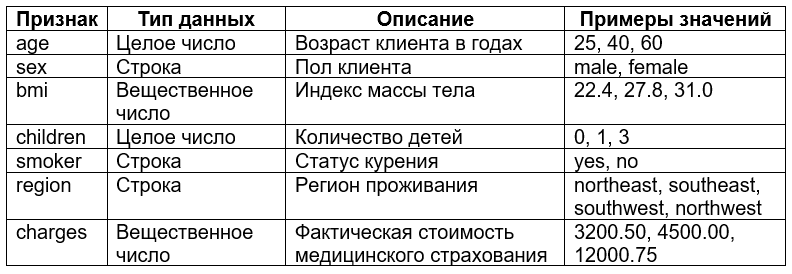


# Предобработка данных

**Загрузка библиотек**

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

**Загрузка файла с данными**

In [207]:
df = pd.read_csv('/content/drive/MyDrive/medical_insurance.csv')
df_orig = df.copy()
df #отображение таблицы с данными

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [208]:
df.info() #просмотр информации по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [209]:
for col in df.select_dtypes(include=['object']).columns:
    all_lower = df[col].dropna().apply(lambda x: x.islower()).all()
    print(f"Столбец '{col}' в нижнем регистре? {all_lower}")

Столбец 'sex' в нижнем регистре? True
Столбец 'smoker' в нижнем регистре? True
Столбец 'region' в нижнем регистре? True


По имеющейся информации можно сделать вывод, что данные в этом датасете особых проблем не имеют. Нулевые значения остутствуют, для каждого столбца используется подходящий тип данных, а также различия в регистрах в текстовых данных отсутствуют.

**Проверка на наличие дубликатов**

In [210]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)

1435


Проверка показала, что в данных имеется большое количество дубликатов. Такое количество может объяснятся тем, что медицинская страховая компания выделила недостаточно признаков для того, чтобы записи имели больше уникальной информации. Так, два и больше разных человек могут иметь одинаковые записи.

Другой причиной может быть и то, что данные собирались из нескольких источников или обновлялись по разным периодам. Так, данные могут содержать повторяющиеся строки для одного и того же человека, что уже более критично для имеющегося набора данных.

**Удаление дубликатов**

In [211]:
df_unique = df.drop_duplicates()
new_duplicates = df_unique.duplicated() #Повторная проверка на наличие дубликатов после удаления
num_duplicates_new = new_duplicates.sum()
print(num_duplicates_new)

0


In [212]:
df_unique

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


После удаления дубликатов получили 1337 строк с уникальными данными, которые помогут в дальнейшей разработке модели машинного обучения.

**Промежуточный вывод:** Для анализа была выбрана задача прогнозирования стоимости медицинского страхования на основе данных с Kaggle, включающих возраст, пол, ИМТ, количество детей, статус курения и регион клиента. Данные отражают ключевые факторы, влияющие на риск и стоимость страховки, что актуально для страховых компаний при установлении тарифов. Основная бизнес-задача — построить модель для точного прогнозирования страховых расходов, что поможет оптимизировать ценообразование и управление рисками.

На этапе предобработки был выполнен обзор данных: изучены структура, типы признаков и наличие пропусков. Проблем с этим обнаружено не было. Были выявлены и удалены дубликаты, чтобы избежать искажения анализа. Типы данных корректны, что обеспечивает готовность данных для дальнейшего моделирования.

# Исследовательский анализ данных

**Индексация по координатам**

In [213]:
# 3 строка и 2 столбец по позиции
print(df_unique.iloc[2, 1])

# Строки 5–10, столбцы 0–2
print(df_unique.iloc[5:11, 0:3])

# Столбец 'age' всех строк
print(df_unique.loc[:, 'age'])

# Строки с индексом 0 до 4, столбец 'region'
print(df_unique.loc[0:4, 'region'])

# Все строки, столбцы 'region' и 'age'
print(df_unique.loc[:, ['region', 'age']])

male
    age     sex    bmi
5    31  female  25.74
6    46  female  33.44
7    37  female  27.74
8    37    male  29.83
9    60  female  25.84
10   25    male  26.22
0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1337, dtype: int64
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object
         region  age
0     southwest   19
1     southeast   18
2     southeast   28
3     northwest   33
4     northwest   32
...         ...  ...
1333  northwest   50
1334  northeast   18
1335  southeast   18
1336  southwest   21
1337  northwest   61

[1337 rows x 2 columns]


**Логическая индексация**

In [214]:
print("1. Люди старше 30")
print("-"*50 + "\n")

print(df_unique[df_unique['age'] > 30])

print("\n" + "-"*50)
print("2. Женщины младше 25")
print("-"*50 + "\n")

print(df_unique[(df_unique['sex'] == 'female') & (df_unique['age'] < 25)])

print("\n" + "-"*50)
print("3. Из западных регионов")
print("-"*50 + "\n")

print(df_unique[df_unique['region'].isin(['northwest', 'southwest'])])

print("\n" + "-"*50)
print("4. Не курящие мужчины с детьми")
print("-"*50 + "\n")

print(df_unique[(df_unique['sex'] == 'male') & (df_unique['children'] > 0) & (df_unique['smoker'] == 'no')])

print("\n" + "-"*50)
print("5. Стоимость страховой между 15k и 20k")
print("-"*50 + "\n")

print(df_unique[(df_unique['charges'] >= 15000) & (df_unique['charges'] <= 20000)])

1. Люди старше 30
--------------------------------------------------

      age     sex     bmi  children smoker     region      charges
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
...   ...     ...     ...       ...    ...        ...          ...
1329   52    male  38.600         2     no  southwest  10325.20600
1330   57  female  25.740         2     no  southeast  12629.16560
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1337   61  female  29.070         0    yes  northwest  29141.36030

[894 rows x 7 columns]

--------------------------------------------------
2. Женщины младше 25
-----------------------------

**Сортировка данных**

In [215]:
print("Сортировка по возрасту")
print("-"*50 + "\n")
df_sorted_age = df_unique.sort_values(by='age')
print(df_sorted_age.head())

print("\n" + "-"*50)
# По возрасту (по убыванию)
df_sorted_age = df_unique.sort_values(by='age', ascending=False)
print(df_sorted_age.head())

print("\n" + "-"*50)
print("Сортировка по ИМТ")
print("-"*50 + "\n")
# По ИМТ (по убыванию)
df_sorted_bmi = df_unique.sort_values(by='bmi', ascending=False)
print(df_sorted_bmi.head())

print("\n" + "-"*50)
print("Сортировка по количеству детей")
print("-"*50 + "\n")
# По количеству детей (по убыванию)
df_sorted_children = df_unique.sort_values(by='children', ascending=False)
print(df_sorted_children.head())

Сортировка по возрасту
--------------------------------------------------

     age     sex     bmi  children smoker     region     charges
1     18    male  33.770         1     no  southeast  1725.55230
22    18    male  34.100         0     no  southeast  1137.01100
50    18  female  35.625         0     no  northeast  2211.13075
866   18    male  37.290         0     no  southeast  1141.44510
369   18    male  30.400         3     no  northeast  3481.86800

--------------------------------------------------
      age     sex    bmi  children smoker     region     charges
603    64  female  39.05         3     no  southeast  16085.1275
635    64    male  38.19         0     no  northeast  14410.9321
1265   64    male  23.76         0    yes  southeast  26926.5144
1241   64    male  36.96         2    yes  southeast  49577.6624
94     64  female  31.30         2    yes  southwest  47291.0550

--------------------------------------------------
Сортировка по ИМТ
-----------------------

**Выводы** по отсортированным данным:

Самый высокий ИМТ — 53.13, что указывает на серьёзное ожирение. Однако, если такие люди молоды, не курят и не имеют детей, то медицинское страхование для них может стоить не очень дорого.

Минимальный возраст клиента — 18 лет, максимальный — 64 года. Молодые люди, особенно некурящие, имеют меньшую стоимость страхования.

Клиенты с 5 детьми требуют отдельного внимания — страхование для них может быть дороже из-за потенциальных дополнительных расходов.

**Фильтр строк методом query**

In [216]:
print("\n" + "-"*50)
print("Клиенты старше 50 лет")
print("-"*50)
print(df_unique.query('age > 50'))

print("\n" + "-"*50)
print("Курящие женщины")
print("-"*50)
print(df_unique.query("sex == 'female' and smoker == 'yes'"))

print("\n" + "-"*50)
print("ИМТ > 30 (ожирение)")
print("-"*50)
print(df_unique.query('bmi > 30'))

print("\n" + "-"*50)
print("Регион southeast и 2 ребёнка")
print("-"*50)
print(df_unique.query("region == 'southeast' and children == 2"))

print("\n" + "-"*50)
print("Молодые некурящие (возраст < 25 и не курят)")
print("-"*50)
print(df_unique.query("age < 25 and smoker == 'no'"))


--------------------------------------------------
Клиенты старше 50 лет
--------------------------------------------------
      age     sex    bmi  children smoker     region      charges
9      60  female  25.84         0     no  northwest  28923.13692
11     62  female  26.29         0    yes  southeast  27808.72510
13     56  female  39.82         0     no  southeast  11090.71780
16     52  female  30.78         1     no  northeast  10797.33620
18     56    male  40.30         0     no  southwest  10602.38500
...   ...     ...    ...       ...    ...        ...          ...
1327   51    male  30.03         1     no  southeast   9377.90470
1329   52    male  38.60         2     no  southwest  10325.20600
1330   57  female  25.74         2     no  southeast  12629.16560
1332   52  female  44.70         3     no  southwest  11411.68500
1337   61  female  29.07         0    yes  northwest  29141.36030

[356 rows x 7 columns]

--------------------------------------------------
Курящие

**Выводы:**
1. Клиенты старше 50 лет:
Эти клиенты находятся в возрастной группе повышенного медицинского риска. Стоимость страхования для них, как правило, выше из-за возраста. Рекомендуется анализировать хронические заболевания и факторы образа жизни в этой категории.

2. Курящие женщины:
Женщины, которые курят, представляют двойной риск: гендерные особенности здоровья + вредная привычка. Такая категория клиентов может нуждаться в дополнительных программах профилактики.

3. ИМТ > 30 (ожирение):
Высокий ИМТ (ожирение) — один из ключевых факторов, повышающих страховые риски (сердечно-сосудистые, диабет и пр.). Эти клиенты потенциально более затратны для страховой компании.

4. Регион 'southeast' и 2 ребёнка:
Этот регион может иметь локальные особенности. Наличие детей также повышает стоимость семейной страховки. Важно учитывать при ценообразовании.

5. Молодые некурящие:
Самая низкая по риску категория клиентов. У них меньше шансов на серьёзные заболевания. Это хорошая группа для базовых планов и программ лояльности.

**Фильтр строк методом where()**

In [217]:
# .dropna() добавлено, чтобы выводились только отфильтрованные строки
print("\n" + "-"*50)
print("Мужчины с ИМТ < 25")
print("-"*50)
print(df_unique.where((df_unique['sex'] == 'male') & (df_unique['bmi'] < 25)).dropna())

print("\n" + "-"*50)
print("Клиенты с 3 и более детьми")
print("-"*50)
print(df_unique.where(df_unique['children'] >= 3).dropna())

print("\n" + "-"*50)
print("Некурящие с нормальным ИМТ (18.5–25)")
print("-"*50)
print(df_unique.where((df_unique['smoker'] == 'no') & (df_unique['bmi'].between(18.5, 25))).dropna())

print("\n" + "-"*50)
print("Возраст 40–60 лет")
print("-"*50)
print(df_unique.where(df_unique['age'].between(40, 60)).dropna())

print("\n" + "-"*50)
print("Женщины из региона northwest")
print("-"*50)
print(df_unique.where((df_unique['sex'] == 'female') & (df_unique['region'] == 'northwest')).dropna())


--------------------------------------------------
Мужчины с ИМТ < 25
--------------------------------------------------
       age   sex     bmi  children smoker     region      charges
3     33.0  male  22.705       0.0     no  northwest  21984.47061
15    19.0  male  24.600       1.0     no  southwest   1837.23700
17    23.0  male  23.845       0.0     no  northeast   2395.17155
28    23.0  male  17.385       1.0     no  northwest   2775.19215
35    19.0  male  20.425       0.0     no  northwest   1625.43375
...    ...   ...     ...       ...    ...        ...          ...
1265  64.0  male  23.760       0.0    yes  southeast  26926.51440
1275  57.0  male  23.700       0.0     no  southwest  10959.33000
1292  21.0  male  23.210       0.0     no  southeast   1515.34490
1295  20.0  male  22.000       1.0     no  southwest   1964.78000
1304  42.0  male  24.605       2.0    yes  northeast  21259.37795

[116 rows x 7 columns]

--------------------------------------------------
Клиенты с 

**Выводы:**
1. Мужчины с ИМТ < 25:
Клиенты с нормальной массой тела имеют более низкие риски. Если при этом они не курят и молоды — идеальные кандидаты для недорогих планов.

2. Клиенты с 3 и более детьми:
Такие клиенты будут выбирать семейные страховые программы. Страховая нагрузка здесь выше, особенно если дети несовершеннолетние. Важно предлагать гибкие тарифы.

3. Некурящие с нормальным ИМТ (18.5–25):
Практически идеальная группа для страхования: здоровый образ жизни, минимальные риски. Хорошие кандидаты для премиальных условий, бонусов и скидок.

4. Возраст 40–60 лет:
Это возраст, в котором уже начинают проявляться хронические заболевания. Однако при здоровом образе жизни (если не курят, нормальный ИМТ) риск может быть умеренным.

5. Женщины из региона northwest:
Региональные особенности могут влиять на доступность медицины. Женщины — основная группа, оформляющая страхование на всю семью. Стоит учитывать при разработке тарифных предложений.

**Сводные таблицы**

In [218]:
#Средний ИМТ по полу и статусу курения
pivot_bmi = df_unique.pivot_table(
    values='bmi',
    index='sex',
    columns='smoker',
    aggfunc='mean'
)
#pivot_bmi.index.name = None
print(pivot_bmi)
print("\n" + "-"*50)

smoker         no        yes
sex                         
female  30.539525  29.608261
male    30.770930  31.504182

--------------------------------------------------


**Выводы:**

*   Мужчины, которые курят, имеют более высокий средний ИМТ, чем некурящие, что указывает на повышенный риск развития заболеваний, связанных с избыточным весом.
*   Среди женщин курящие имеют чуть меньший ИМТ, чем некурящие, что может свидетельствовать о разнице в образе жизни или выборке.
*   Общий уровень ИМТ около 30 свидетельствует о значительной доле клиентов с избыточным весом и потенциальным риском для здоровья.

Страховой компании стоит учитывать эти особенности при оценке риска и формировании тарифов.

In [219]:
#Средний возраст и количество детей по региону
pivot_region = df_unique.pivot_table(
    values=['age', 'children'],
    index='region',
    aggfunc='mean'
)
pivot_region['children'] = pivot_region['children'].round(0)
pivot_region['age'] = pivot_region['age'].round(0)
print(pivot_region)

            age  children
region                   
northeast  39.0       1.0
northwest  39.0       1.0
southeast  39.0       1.0
southwest  39.0       1.0


**Вывод:**

Возраст клиентов и количество детей в среднем на семью во всех регионах примерно одинаков. Однако возможны региональные различия в потребностях и рисках, которые стоит учитывать.

In [220]:
#Количество клиентов по статусу курения и количеству детей
pivot_count = df_unique.pivot_table(
    values='age',
    index='smoker',
    columns='children',
    aggfunc='count',
    fill_value=0
)

print(pivot_count)

children    0    1    2    3   4   5
smoker                              
no        458  263  185  118  22  17
yes       115   61   55   39   3   1


**Выводы:**

*   Большинство клиентов — некурящие (всех категорий по количеству детей значительно больше в строке no).
*   Среди некурящих наибольшее количество клиентов без детей (458), затем с 1 и 2 детьми.
*   Курящих значительно меньше, и они тоже чаще бездетные или с 1-2 детьми.
*   С увеличением количества детей число клиентов резко снижается, особенно среди курящих. Это говорит, что семейные клиенты чаще не курят, возможно, из-за заботы о здоровье семьи.

Для страховой компании это важно при разработке целевых тарифов и программ лояльности: семейные планы лучше ориентировать на некурящих.

Курящие клиенты — меньшая, но важная группа, возможно нуждающаяся в дополнительных программах профилактики.

**Группировка данных**

In [221]:
#Группировка по региону
group_region = df_unique.groupby('region').agg({
    'age': ['mean', 'min', 'max'],
    'bmi': ['mean', 'min', 'max'],
    'children': ['mean', 'min', 'max'],
    'charges': ['mean', 'min', 'max']
})

print(group_region)

                 age                bmi                 children          \
                mean min max       mean     min    max      mean min max   
region                                                                     
northeast  39.268519  18  64  29.173503  15.960  48.07  1.046296   0   5   
northwest  39.259259  19  64  29.195494  17.385  42.94  1.151235   0   5   
southeast  38.939560  18  64  33.355989  19.800  53.13  1.049451   0   5   
southwest  39.455385  19  64  30.596615  17.400  47.60  1.141538   0   5   

                charges                          
                   mean        min          max  
region                                           
northeast  13406.384516  1694.7964  58571.07448  
northwest  12450.840844  1621.3402  60021.39897  
southeast  14735.411438  1121.8739  63770.42801  
southwest  12346.937377  1241.5650  52590.82939  


**Выводы:**

Возраст клиентов по регионам примерно одинаков — в среднем около 39 лет, при этом минимальный возраст — 18-19 лет, максимальный — 64 года. Это показывает широкий возрастной диапазон клиентов.

Количество детей примерно одинаково во всех регионах — около 1 ребёнка в среднем, но максимальное количество детей достигает 5, что говорит о присутствии больших семей среди клиентов.

Средний ИМТ значительно выше в регионе southeast (33.36), что указывает на более высокий уровень избыточного веса и ожирения в этом регионе по сравнению с остальными.

Средняя стоимость страхования самая высокая так же в регионе southeast (около 14735), что коррелирует с более высоким средним ИМТ — повышенный вес и ожирение часто связаны с большими рисками для здоровья и, соответственно, более высокими страховыми выплатами.

В других регионах средняя стоимость страховки немного ниже (от 12 346 до 13 406), при этом максимальные страховые выплаты довольно высокие (до 60 021), что указывает на отдельные случаи с серьезными рисками или дорогостоящим лечением.

**Рекомендации для бизнеса:**

Стоит уделить особое внимание клиентам из региона southeast, так как у них более высокий ИМТ и, следовательно, более высокий риск и стоимость страховки. Возможно, целесообразно разработать специальные программы профилактики и поддержки здорового образа жизни для этого региона, чтобы снизить риски.

В остальных регионах можно сосредоточиться на удержании текущих клиентов и анализе индивидуальных случаев с высокими выплатами.

In [222]:
#группировка по статусу курения и полу
group_smoker_sex = df_unique.groupby(['smoker', 'sex']).agg({
    'charges': ['mean', 'max'],
    'bmi': 'mean',
    'age': 'mean'
})

print(group_smoker_sex)

                    charges                     bmi        age
                       mean          max       mean       mean
smoker sex                                                    
no     female   8762.297300  36910.60803  30.539525  39.691042
       male     8099.700161  32108.66282  30.770930  39.100775
yes    female  30678.996276  63770.42801  29.608261  38.608696
       male    33042.005975  62592.87309  31.504182  38.446541


**Выводы:**

Курящие клиенты значительно платят больше в среднем по страхованию, чем некурящие: средняя стоимость страховки у курящих женщин — около 30,679, у мужчин — около 33,042, что примерно в 3–4 раза выше, чем у некурящих.

Максимальные страховые выплаты у курящих тоже значительно выше, что отражает более высокий риск и более серьёзные медицинские расходы у этой группы.

Средний ИМТ у курящих мужчин выше (31.50), чем у курящих женщин (29.61) и некурящих. Это говорит о том, что среди курящих мужчин больше клиентов с избыточным весом, что усиливает риски.

Средний возраст курящих чуть ниже, чем у некурящих, что может указывать на более молодой контингент среди курящих клиентов, либо особенности выборки.

Не курящие мужчины и женщины имеют близкие средние значения ИМТ и возраста, а также значительно меньшие страховые расходы.

**Бизнес-рекомендации:**

Курящие клиенты — группа с повышенным риском и стоимостью страхования, что требует особого внимания при формировании тарифов и профилактических программ.

Мужчины-курильщики имеют самый высокий средний ИМТ и стоимость страхования, что может быть приоритетной группой для программ здоровья и мотивации к отказу от курения.

Для некурящих клиентов можно предлагать более выгодные условия, так как их риск и расходы ниже.

Страховой компании полезно развивать программы по снижению курения среди клиентов, что потенциально сократит расходы.



**Промежуточные выводы по исследовательскому анализу:**

В ходе выполнения исследовательского анализа данных с помощью различных методов (индексация, группировка, фильтрация и т.д.) были выявлены закономерности в образовании стоимости медицинского страхования для различных групп клиентов по их характеристикам. Высокий ИМТ и курение значительно увеличивают страховые риски и расходы, особенно у мужчин и клиентов из региона southeast. Молодые, некурящие клиенты с нормальным ИМТ представляют наименьший риск и могут получать более выгодные тарифы. Семейные клиенты, особенно с несколькими детьми, требуют индивидуального подхода в разработке страховых программ. Для оптимизации тарифов и снижения расходов рекомендуется внедрять профилактические программы, ориентированные на снижение курения и ожирения, а также учитывать региональные особенности и демографические группы при формировании страховых продуктов.

Все эти данные помогут оптимизировать тарифы и разработать профилактические программы для снижения страховых затрат.

# Статистический анализ данных

**Основные статистические показатели**

In [223]:
numeric_cols = ['age', 'bmi', 'children', 'charges'] #выделение числовых признаков для единого вывода

for col in numeric_cols:
    print(f"\nСтатистические показатели для '{col}':")
    mean_val = df_unique[col].mean()
    median_val = df_unique[col].median()
    mode_val = df_unique[col].mode().values
    std_val = df_unique[col].std()
    quantiles = df_unique[col].quantile([0.25, 0.5, 0.75]).to_dict()

    print(f"Среднее значение (mean): {mean_val:.2f}")
    print(f"Медиана (median): {median_val:.2f}")
    mode_rounded = [f"{m:.2f}" for m in mode_val]
    print(f"Мода (mode): {mode_val}")
    print(f"Стандартное отклонение (std): {std_val:.2f}")
    print(f"Квартильное распределение (quantiles): {quantiles}") #округление для квартилей не работает корректно,
                                                                    # поэтому пришлось его пропустить


Статистические показатели для 'age':
Среднее значение (mean): 39.22
Медиана (median): 39.00
Мода (mode): [18]
Стандартное отклонение (std): 14.04
Квартильное распределение (quantiles): {0.25: 27.0, 0.5: 39.0, 0.75: 51.0}

Статистические показатели для 'bmi':
Среднее значение (mean): 30.66
Медиана (median): 30.40
Мода (mode): [32.3]
Стандартное отклонение (std): 6.10
Квартильное распределение (quantiles): {0.25: 26.29, 0.5: 30.4, 0.75: 34.7}

Статистические показатели для 'children':
Среднее значение (mean): 1.10
Медиана (median): 1.00
Мода (mode): [0]
Стандартное отклонение (std): 1.21
Квартильное распределение (quantiles): {0.25: 0.0, 0.5: 1.0, 0.75: 2.0}

Статистические показатели для 'charges':
Среднее значение (mean): 13279.12
Медиана (median): 9386.16
Мода (mode): [ 1121.8739   1131.5066   1135.9407  ... 60021.39897 62592.87309
 63770.42801]
Стандартное отклонение (std): 12110.36
Квартильное распределение (quantiles): {0.25: 4746.344, 0.5: 9386.1613, 0.75: 16657.71745}


**Общие выводы по полученным значениям:**

*   Возраст и ИМТ распределены довольно симметрично.
*   Многие клиенты — молодые (мода 18 лет) и с избыточным весом.
*   Большинство клиентов имеют 0-2 детей.
*   Расходы на медицинское страхование сильно варьируются, с небольшой частью клиентов, которые платят очень большие суммы, что влияет на среднее значение.
*   Медиана и квартильный анализ показывает, что типичный клиент платит значительно меньше среднего.

**Матрица корреляций**

In [224]:
corr_matrix = df_unique[numeric_cols].corr()

print("Матрица корреляций:")
print(corr_matrix)

# Вывод пар с высокой корреляцией
threshold = 0.7
found = False
print("\nПризнаки с корреляцией выше 0.7 или ниже -0.7:")

for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            print(f"{numeric_cols[i]} и {numeric_cols[j]}: корреляция = {corr_value:.2f}")
            found = True

if not found:
    print("Пар с корреляцией выше 0.7 или ниже -0.7 не найдено.")

Матрица корреляций:
               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000

Признаки с корреляцией выше 0.7 или ниже -0.7:
Пар с корреляцией выше 0.7 или ниже -0.7 не найдено.


**Выводы:**

*   В анализе числовых признаков (age, bmi, children, charges) не было выявлено пар с высокой корреляцией (выше 0.7 или ниже -0.7). Это говорит о том, что между этими признаками отсутствуют очень сильные линейные взаимосвязи. А значит, что эти показатели, скорее всего, влияют на цену страховки независимо друг от друга.
*   Самая сильная положительная связь — между возрастом (age) и стоимостью страховки (charges), но она только около 0.30 — это слабая или умеренная корреляция.

**Влияние на бизнес-процессы**

*Разрозненное влияние факторов:*
Каждый фактор (возраст, ИМТ, количество детей) оказывает слабое независимое влияние на стоимость медицинского страхования. Это указывает, что цена формируется за счёт совокупности множества факторов, а не доминирующего одного.

*Необходимость комплексного подхода:*
Для оценки риска и ценообразования стоит использовать комбинацию признаков, а не опираться на один показатель. Модели, которые учитывают все параметры вместе, будут точнее.

*Персонализация продуктов:*
Разнообразие клиентов с разными характеристиками (возраст, вес, семья) означает, что страховые продукты должны быть гибкими и учитывать индивидуальные особенности, а не шаблонными.

*Отсутствие мультиколлинеарности:*
Низкие корреляции между признаками хороши с точки зрения построения статистических моделей, поскольку исключают проблему избыточности информации и позволяют лучше оценивать влияние каждого признака.

*Маркетинговые стратегии:*
Поскольку сильных взаимосвязей нет, бизнес может создавать различные маркетинговые предложения и тарифы, ориентируясь отдельно на возрастные группы, категории ИМТ и семейное положение, не опасаясь, что эти сегменты сильно пересекаются.


*Низкие корреляции* отражают разнообразие причин, влияющих на стоимость, что является типичным для таких данных.

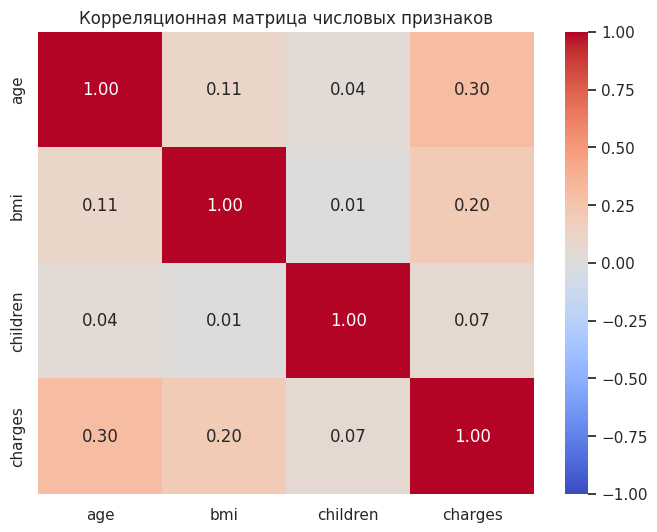

In [225]:
#тепловая карта для матрицы корреляций
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

**Анализ распределений**

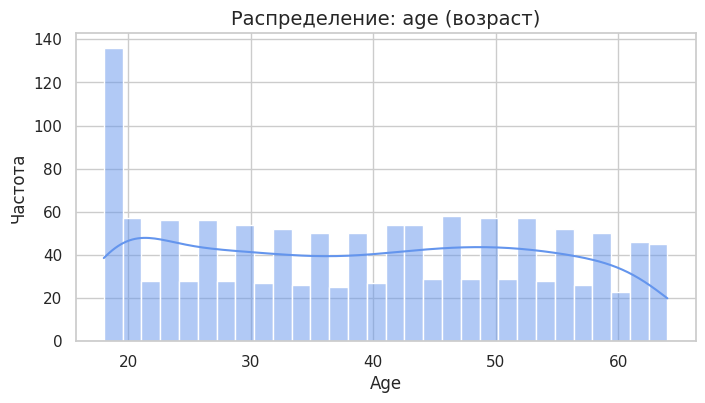

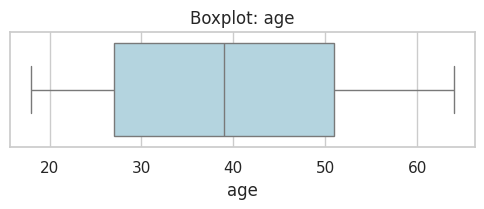

In [226]:
# анализ возраста
plt.figure(figsize=(8, 4))
sns.histplot(data=df_unique, x='age', kde=True, bins=30, color='cornflowerblue')
plt.title('Распределение: age (возраст)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Boxplot (для поиска выбросов)
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df_unique['age'], color='lightblue')
plt.title('Boxplot: age')
plt.show()

Форма: близка к нормальному распределению, умеренно симметрична.

Пик: на 18 лет — видно по моде.

Выбросы: отсутствуют (данные ограничены естественным возрастом).

Асимметрия: слабая или отсутствует.

Вывод: Как и было выявлено ранее преобладающее количество клиентов - это молодые люди возрастом 18 лет. Данный показатель не нуждается в дополнительных трансформациях, его дальнейшнее использование в модели не повлияет на её результаты негативно.

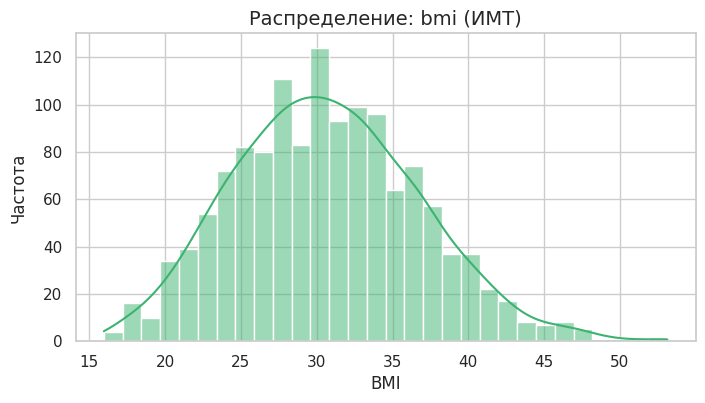

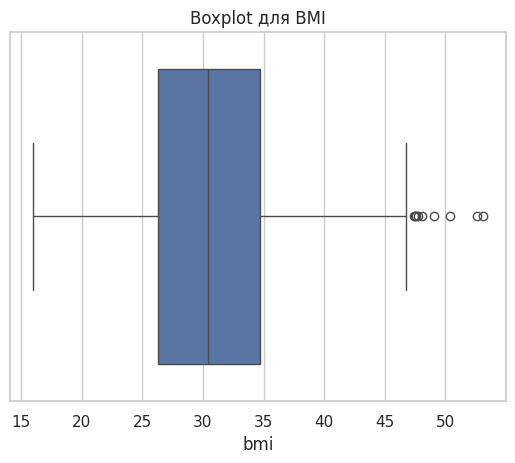

In [227]:
# анализ ИМТ
plt.figure(figsize=(8, 4))
sns.histplot(data=df_unique, x='bmi', kde=True, bins=30, color='mediumseagreen')
plt.title('Распределение: bmi (ИМТ)', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Проверка выбросов через boxplot
sns.boxplot(x=df_unique['bmi'])
plt.title("Boxplot для BMI")
plt.show()

Форма: примерно симметрична, но возможен небольшой сдвиг вправо.

Пик: в районе 30–32.

Выбросы: имеются при значениях bmi > 45–50.

Асимметрия: слабая положительная.

Вывод: Как было выявлено и во всех предыдущих результатах, среди клиентов данной страховой компании преобладают люди с ожирением (повышенным ИМТ). Имеются и клиенты с очень высоким индексом массы тела, значительно превышающим типичные значения. Такое распределение важно учитывать при построении моделей и интерпретации результатов, поскольку наличие выбросов и скошенность могут влиять на оценку взаимосвязей и качество предсказаний.

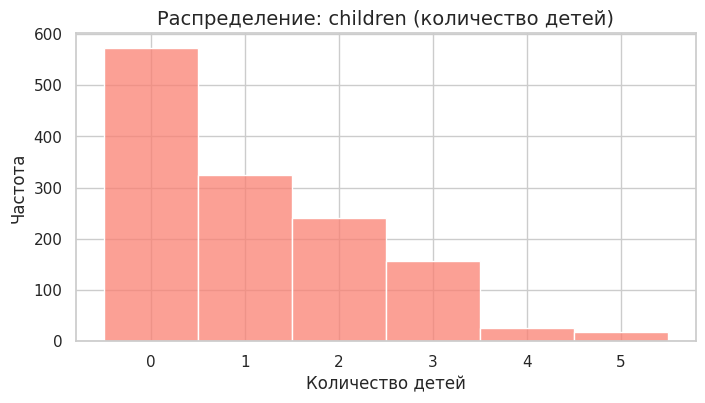

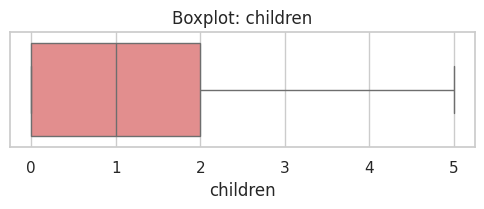

In [228]:
# Гистограмма (дискретные значения) для анализа количества детей в семьях
plt.figure(figsize=(8, 4))
sns.histplot(data=df_unique, x='children', bins=range(df['children'].max() + 2), discrete=True, color='salmon')
plt.title('Распределение: children (количество детей)', fontsize=14)
plt.xlabel('Количество детей')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df_unique['children'], color='lightcoral')
plt.title('Boxplot: children')
plt.show()

Форма: дискретное распределение с пиками на 0 и 1.

Пик: мода — 0.

Выбросы: выбросов нет, значения ограничены (например, максимум 5).

Асимметрия: распределение скошено влево (больше нулей).

Вывод: Распределение скошено влево, что отражает преобладание клиентов без детей или с одним ребёнком по сравнению с семьями большего размера. Данный профиль клиентов следует учитывать при построении моделей и при сегментации, так как количество детей может влиять на уровень страховых расходов и рисков.

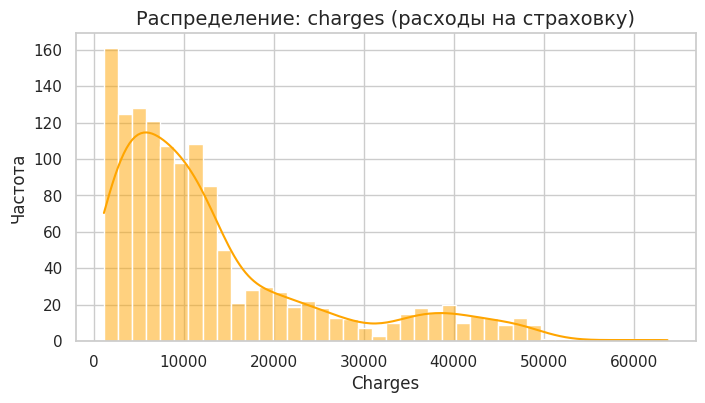

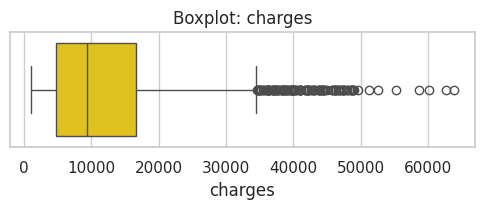

In [229]:
# Гистограмма + KDE
plt.figure(figsize=(8, 4))
sns.histplot(data=df_unique, x='charges', kde=True, bins=40, color='orange')
plt.title('Распределение: charges (расходы на страховку)', fontsize=14)
plt.xlabel('Charges')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df_unique['charges'], color='gold')
plt.title('Boxplot: charges')
plt.show()

Форма: сильно скошенное вправо (right-skewed) распределение.

Пик: большинство клиентов платят < 10 000.

Выбросы: есть выраженные выбросы — отдельные клиенты с затратами > 30 000.

Асимметрия: высокая положительная.

Вывод: Такая форма распределения — сильно скошенная вправо — указывает на то, что небольшая группа клиентов вносит непропорционально большой вклад в общую сумму страховых расходов. Это смещает среднее значение вверх по сравнению с медианой.

**Таблицы сопряженности**

In [230]:
# Таблица сопряженности для пола (sex) и статуса курения (smoker)
# Таблица сопряженности (частоты)
ct_sex_smoker = pd.crosstab(df_unique['sex'], df_unique['smoker'])
print("\nТаблица сопряженности (частоты)")
print(ct_sex_smoker)

# Таблица с долями по строкам (процент курящих внутри каждого пола)
ct_sex_smoker_row = pd.crosstab(df_unique['sex'], df_unique['smoker'], normalize='index').round(3)
print("\nТаблица с долями по строкам (процент курящих внутри каждого пола)")
print(ct_sex_smoker_row)

# Таблица с долями по столбцам (процент полов внутри каждой категории курения)
ct_sex_smoker_col = pd.crosstab(df_unique['sex'], df_unique['smoker'], normalize='columns').round(3)
print("\nТаблица с долями по столбцам (процент полов внутри каждой категории курения)")
print(ct_sex_smoker_col)


Таблица сопряженности (частоты)
smoker   no  yes
sex             
female  547  115
male    516  159

Таблица с долями по строкам (процент курящих внутри каждого пола)
smoker     no    yes
sex                 
female  0.826  0.174
male    0.764  0.236

Таблица с долями по столбцам (процент полов внутри каждой категории курения)
smoker     no   yes
sex                
female  0.515  0.42
male    0.485  0.58


**Выводы:**

Мужчины в выборке курят чаще, чем женщины.

Пол и статус курения связаны, но не категорично — среди некурящих мужчин и женщин почти одинаково.

Для дальнейшего анализа (например, влияния курения и пола на стоимость страховки) стоит учитывать, что эти признаки частично пересекаются.

In [231]:
# Частоты
ct_region_sex = pd.crosstab(df_unique['region'], df_unique['sex'])
print("\nТаблица сопряженности (частоты)")
print(ct_region_sex)

# Доли по строкам (например, доля каждого пола в каждом регионе)
ct_region_sex_row = pd.crosstab(df_unique['region'], df_unique['sex'], normalize='index').round(3)
print("\nДоли по строкам (доля каждого пола в каждом регионе)")
print(ct_region_sex_row)


Таблица сопряженности (частоты)
sex        female  male
region                 
northeast     161   163
northwest     164   160
southeast     175   189
southwest     162   163

Доли по строкам (доля каждого пола в каждом регионе)
sex        female   male
region                  
northeast   0.497  0.503
northwest   0.506  0.494
southeast   0.481  0.519
southwest   0.498  0.502


**Выводы:**

Пол и регион не имеют заметной взаимосвязи: количество мужчин и женщин примерно одинаково во всех регионах.

В дальнейшем при анализе данных можно считать, что пол и регион — независимые признаки.

In [232]:
# Частотная таблица: сколько курящих и некурящих в каждом регионе
ct_region_smoker = pd.crosstab(df_unique['region'], df_unique['smoker'])
print("Таблица сопряженности (частоты):")
print(ct_region_smoker)

# Доли по строкам: доля курящих и некурящих внутри каждого региона
ct_region_smoker_row = pd.crosstab(df_unique['region'], df_unique['smoker'], normalize='index').round(3)
print("\nДоли по строкам (внутри региона):")
print(ct_region_smoker_row)

# Доли по столбцам: доля регионов внутри каждой категории курения
ct_region_smoker_col = pd.crosstab(df_unique['region'], df_unique['smoker'], normalize='columns').round(3)
print("\nДоли по столбцам (внутри статуса курения):")
print(ct_region_smoker_col)

Таблица сопряженности (частоты):
smoker      no  yes
region             
northeast  257   67
northwest  266   58
southeast  273   91
southwest  267   58

Доли по строкам (внутри региона):
smoker        no    yes
region                 
northeast  0.793  0.207
northwest  0.821  0.179
southeast  0.750  0.250
southwest  0.822  0.178

Доли по столбцам (внутри статуса курения):
smoker        no    yes
region                 
northeast  0.242  0.245
northwest  0.250  0.212
southeast  0.257  0.332
southwest  0.251  0.212


**Выводы:**

Регион Southeast выделяется более высокой долей курящих клиентов по сравнению с другими регионами.

В остальных регионах количество курящих примерно одинаково и ниже.

Это может указывать на региональные особенности, влияющие на привычку курения.

**Проверка гипотез**

1. Средний размер расходов на медицинское страхование (charges) у курящих и некурящих клиентов статистически отличается.

In [233]:
# Группы по признаку smoker
charges_smoker = df[df['smoker'] == 'yes']['charges']
charges_nonsmoker = df[df['smoker'] == 'no']['charges']

# t-тест для независимых выборок
t_stat, p_value = ttest_ind(charges_smoker, charges_nonsmoker, equal_var=False)  # Welch's t-test, если дисперсии разные

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: средние значения расхода на страховку у курящих и некурящих статистически различаются.")
else:
    print("Нет оснований отвергать нулевую гипотезу: статистически значимых различий в средних расходах между группами нет.")

t-statistic: 47.4455
p-value: 2.8989e-212
Отвергаем нулевую гипотезу: средние значения расхода на страховку у курящих и некурящих статистически различаются.


**Вывод:** Средние расходы на медицинское страхование у курящих и некурящих клиентов статистически значительно отличаются. Полученное очень низкое p-значение (почти ноль) и высокая t-статистика подтверждают, что эта разница не случайна. Курящие платят существенно больше, чем некурящие.

2. Средние расходы на страхование (charges) у клиентов с детьми и без детей статистически различаются.

In [234]:
# Группы
charges_with_children = df_unique[df_unique['children'] > 0]['charges']
charges_without_children = df_unique[df_unique['children'] == 0]['charges']

# t-тест (Welch's)
t_stat, p_value = ttest_ind(charges_with_children, charges_without_children, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: средние расходы у клиентов с детьми и без детей статистически различаются.")
else:
    print("Нет оснований отвергать нулевую гипотезу: статистически значимых различий в средних расходах нет.")

t-statistic: 2.3458
p-value: 1.9143e-02
Отвергаем нулевую гипотезу: средние расходы у клиентов с детьми и без детей статистически различаются.


**Вывод:** Средние расходы на медицинское страхование у клиентов с детьми и без детей статистически значимо отличаются. Полученное p-значение меньше 0.05, что говорит о том, что наличие детей влияет на размер страховых затрат. Клиенты с детьми платят больше.

**Промежуточные выводы по результатам статистического анализа:**

Результаты статистического анализа можно использовать для практических решений в бизнесе медицинского страхования:

1. Персонализация тарифов и продуктов

- Возраст и ИМТ: данные показывают, что с возрастом и ростом ИМТ растут и
расходы на страхование, но влияние каждого признака умеренное. Значит, при формировании тарифов лучше учитывать сразу несколько факторов, чтобы точнее оценивать риск.

- Статус курения: разница в расходах между курящими и некурящими статистически значима и очень велика. Это оправдывает создание специальных тарифов с повышенной стоимостью для курящих или программ по отказу от курения.

2. Сегментация клиентов
- По региону: данные о различиях в поведении курящих по регионам помогают таргетировать маркетинговые кампании. Например, в регионе Southeast выше доля курящих — можно делать акцент на программы профилактики или тарифы с учётом повышенного риска.

- По наличию детей: клиенты с детьми платят статистически больше — страховые продукты могут быть адаптированы под семейные нужды, например, с дополнительными опциями или скидками.

3. Управление рисками - Отсутствие сильных корреляций между числовыми признаками говорит, что риски распределены по разным факторам, и не стоит полагаться на один показатель. Это стимулирует использование комплексных моделей оценки риска.

4. Оптимизация маркетинга и обслуживания - Знание того, что пол и статус курения взаимосвязаны, помогает предлагать клиентам более релевантные продукты и услуги.

Распределение по регионам и группам помогает планировать локальные акции и улучшать обслуживание клиентов с учётом их характеристик.

# Графический анализ данных

Поскольку тепловая карта для матрицы корреляций, а также графики распределения и "ящик с усами" были построены в предыдущем разделе "Статистические данные", будем считать, что для данного раздела нужно построить по одной диаграмме из каждой библиотеки matplotlib и seaborn

Поскольку по предыдущим исследованиям было выяснено, что количество детей сильно влияет на стоимость медицинского страхования, было принято решение отобразить в виде круговой диаграммы эту зависимость для большей наглядности.

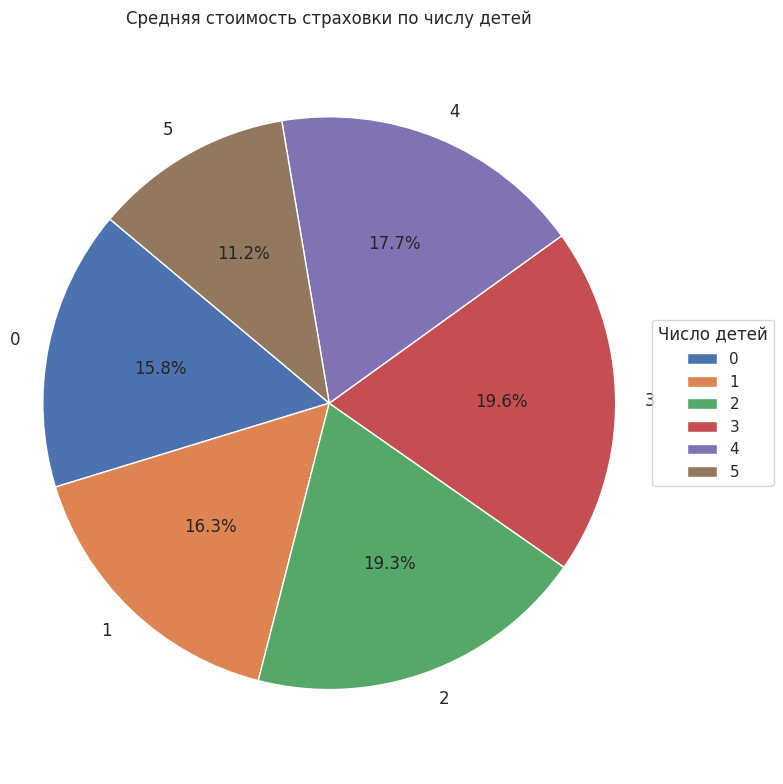

In [235]:
mean_charges_by_children = df_unique.groupby('children')['charges'].mean()

children_labels = mean_charges_by_children.index.astype(str)
mean_charges = mean_charges_by_children.values

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    mean_charges,
    labels=children_labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)

ax.axis('equal')  # Круглая диаграмма
ax.set_title('Средняя стоимость страховки по числу детей')

# Добавляем легенду отдельно (без процентов, только метки)
ax.legend(wedges, children_labels, title='Число детей', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

**Вывод:** диаграмма показывает, что наибольшую среднюю стоимость страховки демонстрируют семьи с 2–4 детьми, что может быть важно при разработке целевых страховых продуктов.

Для следующего графика воспользуемся данными из таблиц сопряженности из раздела Статистические данные. Конкретно была выбрана таблица Количество курящих и некурящих в каждом регионе, Доли по строкам (внутри региона), так как она наиболее информативна.

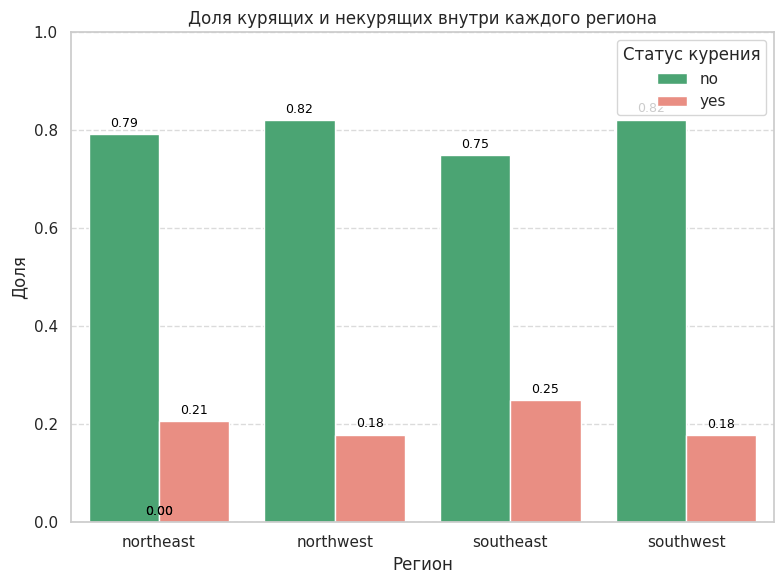

In [205]:
# Доли по строкам (внутри региона)
data = {
    'region': ['northeast', 'northwest', 'southeast', 'southwest'],
    'no': [0.793, 0.821, 0.750, 0.822],
    'yes': [0.207, 0.179, 0.250, 0.178]
}

df = pd.DataFrame(data)

# Преобразование из wide в long формат для seaborn
df_long = df.melt(id_vars='region', var_name='smoker', value_name='proportion')

plt.figure(figsize=(8, 6))
sns.barplot(data=df_long, x='region', y='proportion', hue='smoker', palette=['mediumseagreen', 'salmon'])

plt.title('Доля курящих и некурящих внутри каждого региона')
plt.ylabel('Доля')
plt.xlabel('Регион')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}',
                       (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom',
                       fontsize=9, color='black', xytext=(0, 3),
                       textcoords='offset points')

plt.legend(title='Статус курения', loc='upper right')
plt.tight_layout()
plt.show()

**Вывод:** Данный график наглядно показывает, что в восточных регионах преобладет количество курящих людей, и что при этом регион southeast обыгрывает всех по доле курящих людей в нем.

# Портрет типичного потребителя (клиента) медицинской страховой компании

**Сбор общих данных со всего проведенного анализа**

Демография:

- Возраст: Преобладают молодые клиенты, особенно в возрасте 18 лет (мода), но в выборке также значительная доля клиентов от 30 до 50 лет.

- Пол: Мужчины и женщины представлены примерно одинаково. Однако мужчины курят чаще, а женщины чаще оформляют семейные полисы.

- Дети: Большинство клиентов имеют 0–2 ребёнка, чаще — 0 детей. Клиенты с 3+ детьми встречаются реже и обычно не курят.

Образ жизни и здоровье:
Курение: Большинство клиентов не курят. Среди курящих — более высокая стоимость страховки и большее число хронических рисков.

- ИМТ: Средний ИМТ близок к 30, то есть большинство клиентов имеют избыточный вес или ожирение. Особенно выделяется регион Southeast, где ИМТ в среднем ещё выше.

- Физическая форма: Некурящие с нормальным ИМТ — наиболее желательная категория для страховой компании с точки зрения рисков и затрат.

Финансовые характеристики:
- Стоимость страховки:

 - В среднем, курящие клиенты платят в 3–4 раза больше, чем некурящие.

 - Стоимость страховки растёт с увеличением числа детей и возраста.

 - Небольшая доля клиентов (с очень высокими затратами) сильно смещает среднее вверх — данные скошены вправо.

- Семейное положение: Клиенты с детьми, особенно с 2–3 детьми, платят больше, чаще выбирают семейные планы.

- Региональные различия:

 - Регион Southeast выделяется более высокими ИМТ, долей курящих и средней стоимостью страховки.

 - В остальных регионах различия менее выражены.

**Итоговый портрет типичного клиента:** молодой некурящий человек в возрасте около 18–30 лет, чаще без детей или с 1 ребёнком, с избыточным весом (ИМТ около 30). Он, скорее всего, проживает в одном из центральных или северных регионов (не Southeast), имеет умеренные медицинские расходы и подходит под базовые или стандартные страховые планы.